# QUiz 2 
# Chris Sunny Thaliyath
# 2023MTECHCO101880

# Regression model using scikit learn 

In [74]:
## IMPORT THE DATA

import numpy as np
import csv
import pandas as pd


# f = open("regression_analysis_dataset.csv")
# f.readline()  # skip the header
# data = np.loadtxt(f)

#dataset = np.loadtxt('regression_analysis_dataset.csv', delimiter=',')

# with open("regression_analysis_dataset.csv", 'r') as file:
#   csvreader = csv.reader(file)
#   for row in csvreader:
#     print(row)

data = pd.read_csv("regression_analysis_dataset.csv")
#print(data)
print(data.head()) 
print("\n\n\nSHAPE",data.shape) 

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520



SHAPE (1338, 7)


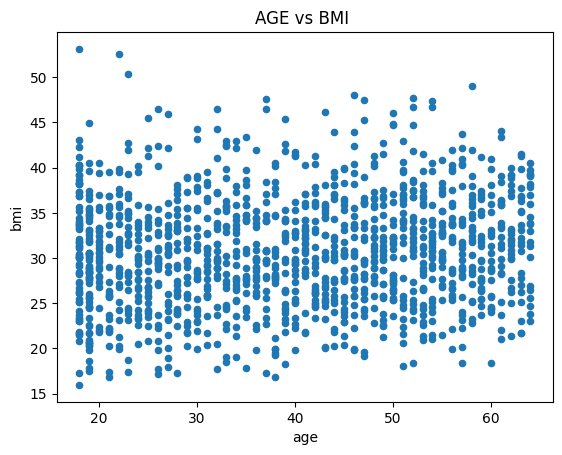

In [75]:
#Initial Data analysis by scatter plotting on matplot lib
#EXPLORATORY DATA ANALYSIS
import matplotlib.pyplot as plt

data.plot.scatter(x='age', y='bmi' , title='AGE vs BMI ');

Pandas also ships with a great helper method for statistical summaries, 
and we can describe() the dataset to get an idea of the mean, maximum, minimum, etc. values of our columns:

In [76]:
print(data.describe())

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


In [77]:
print(data.describe().round(2).T)

           count      mean       std      min      25%      50%       75%  \
age       1338.0     39.21     14.05    18.00    27.00    39.00     51.00   
bmi       1338.0     30.66      6.10    15.96    26.30    30.40     34.69   
children  1338.0      1.09      1.21     0.00     0.00     1.00      2.00   
charges   1338.0  13270.42  12110.01  1121.87  4740.29  9382.03  16639.91   

               max  
age          64.00  
bmi          53.13  
children      5.00  
charges   63770.43  


In [78]:
!pip3 install seaborn
# conventional way to import seaborn
import seaborn as sns

# allow plots to appear within the notebook
%matplotlib inline


[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python3.11 -m pip install --upgrade pip


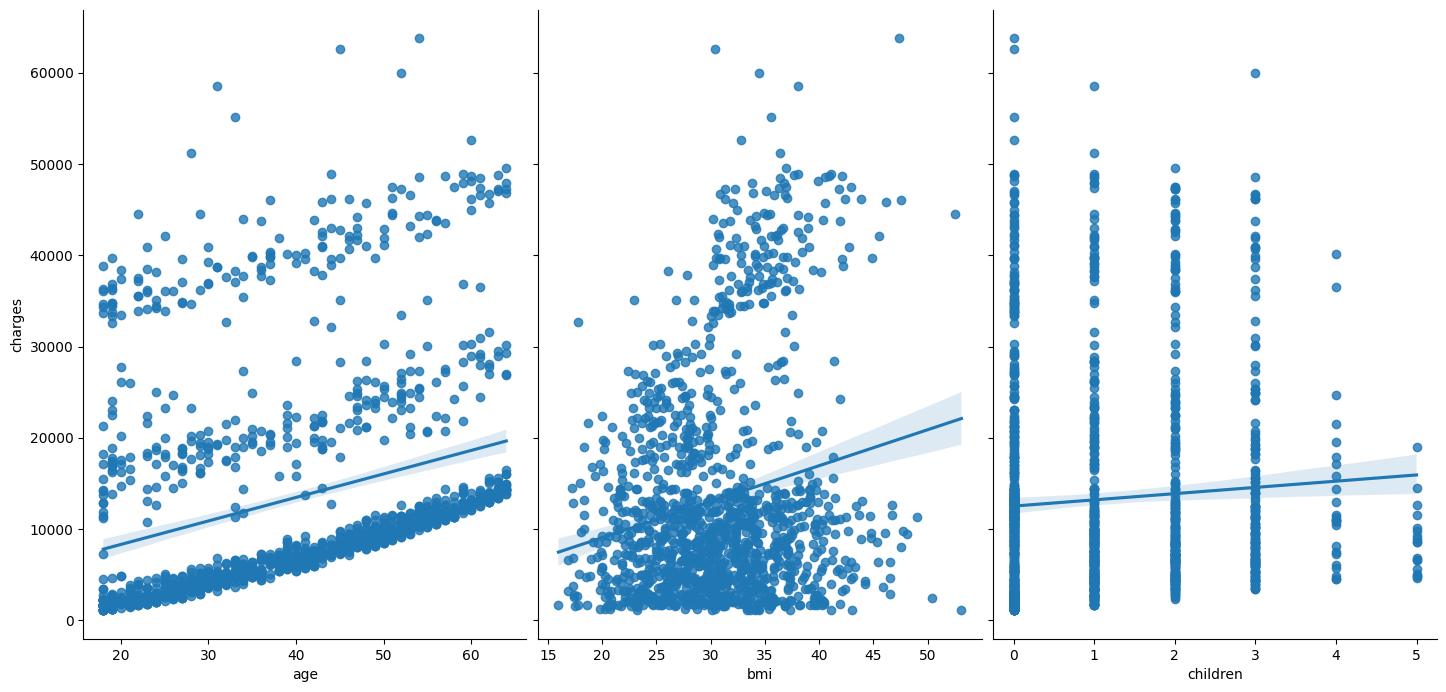

In [79]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(data, x_vars=['age','bmi','children'], y_vars='charges', height=7, aspect=0.7, kind='reg')

Form of linear regression

 is the response
 is the intercept
 is the coefficient for 
 (the first feature)
 is the coefficient for 
 (the nth feature)
In this case:


The 
 values are called the model coefficients. These values are "learned" during the model fitting step using the "least squares" criterion. Then, the fitted model can be used to make predictions!


 age     sex     bmi  children smoker     region      charges

In [80]:
# create a Python list of feature names
#feature_cols_x = ['age', 'sex', 'bmi' , 'children', 'smoker' , 'region']

feature_cols_x = ['age', 'sex', 'bmi' , 'children', 'smoker' ]


# use the list to select a subset of the original DataFrame
X = data[feature_cols_x]
#print(X['sex'])
for i in range(0,len(X['sex'])):
    if X['sex'][i] == 'female':
        X['sex'][i] = 1
    if X['sex'][i] == 'male':
        X['sex'][i] = 100

print(" BASICALLY I REPLACED \nFEMALE -- 1 \nMALE   -- 2")
print(X['sex'])


for i in range(0,len(X['smoker'])):
    if X['smoker'][i] == 'yes':
        X['smoker'][i] = 1
    if X['smoker'][i] == 'no':
        X['smoker'][i] = 0

print(" BASICALLY I REPLACED \nsmoker-yes -- 1 \nsmoker-no   -- 2")
#  
#                       
print(X['smoker'])


# for i in range(0,len(X['region'])):
#     if X['smoker'][i] == 'yes':
#         X['smoker'][i] = 1
#     if X['smoker'][i] == 'no':
#         X['smoker'][i] = 0

# print(" BASICALLY I REPLACED \nsmoker-yes -- 1 \nsmoker-no   -- 2")
# #  
# #                       
# print(X['smoker'])

feature_cols_y = ['charges']
# use the list to select a subset of the original DataFrame
Y = data[feature_cols_y]

# print the first 5 rows
print(X.head())
print(Y.head())

 BASICALLY I REPLACED 
FEMALE -- 1 
MALE   -- 2
0         1
1       100
2       100
3       100
4       100
       ... 
1333    100
1334      1
1335      1
1336      1
1337      1
Name: sex, Length: 1338, dtype: object
 BASICALLY I REPLACED 
smoker-yes -- 1 
smoker-no   -- 2
0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: object
   age  sex     bmi  children smoker
0   19    1  27.900         0      1
1   18  100  33.770         1      0
2   28  100  33.000         3      0
3   33  100  22.705         0      0
4   32  100  28.880         0      0
       charges
0  16884.92400
1   1725.55230
2   4449.46200
3  21984.47061
4   3866.85520


/var/folders/xr/rvs3y4j51wb_20993x051pbr0000gn/T/ipykernel_65601/2372053188.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['sex'][i] = 1
/var/folders/xr/rvs3y4j51wb_20993x051pbr0000gn/T/ipykernel_65601/2372053188.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['sex'][i] = 100
/var/folders/xr/rvs3y4j51wb_20993x051pbr0000gn/T/ipykernel_65601/2372053188.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['sex'][i] = 100


In [81]:
#SPLIT THE DATA

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1)

In [82]:
# default split is 75% for training and 25% for testing
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(1003, 5)
(1003, 1)
(335, 5)
(335, 1)


In [83]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression()

In [84]:
# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

[-11243.21278757]
[[ 2.52277070e+02 -2.59851190e+00  3.08930902e+02  3.59000639e+02
   2.40690177e+04]]


In [85]:
# pair the feature names with the coefficients
list(zip(feature_cols, linreg.coef_))

[('age',
  array([ 2.52277070e+02, -2.59851190e+00,  3.08930902e+02,  3.59000639e+02,
          2.40690177e+04]))]

In [86]:
# make predictions on the testing set
y_pred = linreg.predict(X_test)

In [87]:
# Importing required packages
!pip3 install statsmodels
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

def overview():
    '''
    Read a comma-separated values (csv) file into DataFrame.
    Print 5 rows of data
    Print number of rows and columns
    Print datatype for each column
    Print number of NULL/NaN values for each column
    Print summary data
    
    Return:
    data, rtype: DataFrame
    '''
    data = pd.read_csv('regression_analysis_dataset.csv')
    print("The first 5 rows if data are:\n", data.head())
    print("\n")
    print("The (Row,Column) is:\n", data.shape)
    print("\n")
    print("Data type of each column:\n", data.dtypes)
    print("\n")
    print("The number of null values in each column are:\n", data.isnull().sum())
    print("\n")
    print("Numeric summary:\n", data.describe())
    return data

df = overview()


[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
The first 5 rows if data are:
    age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


The (Row,Column) is:
 (1338, 7)


Data type of each column:
 age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


The number of null values in each column are:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


Numeric summary:
                age          bmi     children       charges
co

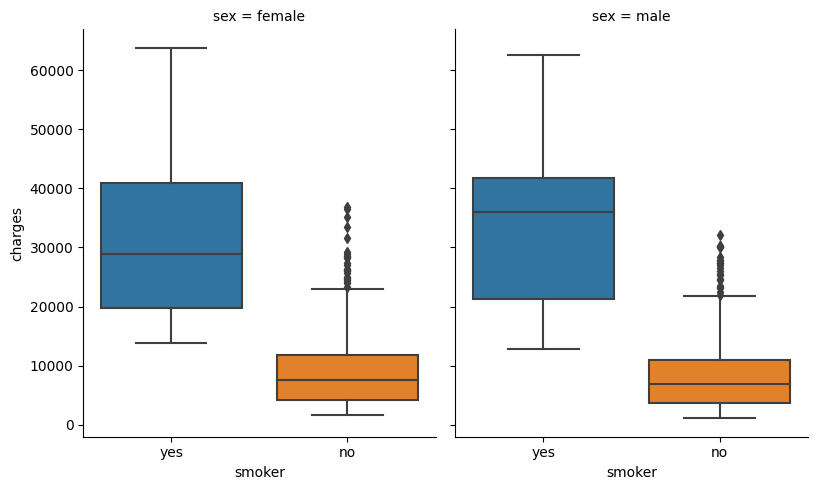

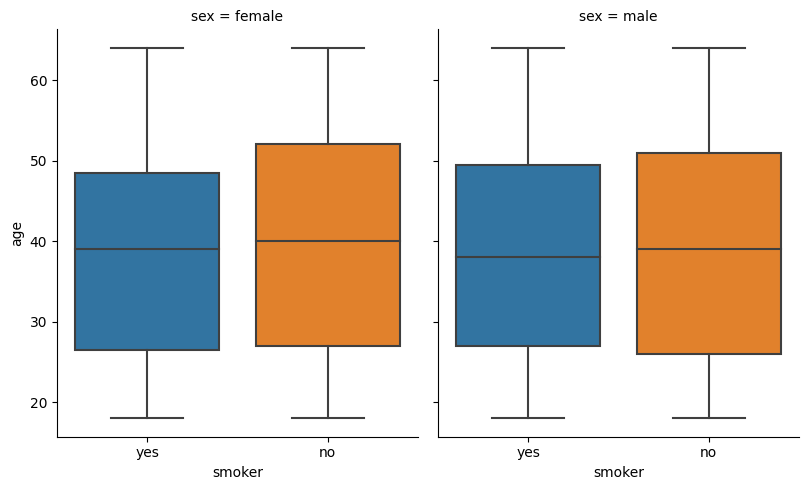

In [88]:
# Sorting out numerical and categorical variables 
def categorical_variable(df):
    return list(df.select_dtypes(include = ['category', 'object']))

def numerical_variable(df):
    return list(df.select_dtypes(exclude = ['category', 'object']))

g = sns.catplot(x="smoker", y="charges",col_wrap=3, col="sex",data= df, kind="box",height=5, aspect=0.8);

g = sns.catplot(x="smoker", y="age",col_wrap=3, col="sex",data= df, kind="box",height=5, aspect=0.8);

In [89]:
# Changing categorical values to numeric
df2 = df.copy()
#sex
le = LabelEncoder()
le.fit(df2.sex.drop_duplicates()) 
df2.sex = le.transform(df2.sex)
# smoker or not
le.fit(df2.smoker.drop_duplicates()) 
df2.smoker = le.transform(df2.smoker)
#region
le.fit(df2.region.drop_duplicates()) 
df2.region = le.transform(df2.region)

In [90]:
#Measuring correlation
print(df2.corr()['charges'])

lm = ols('sex ~ charges', data = df2).fit()
table = sm.stats.anova_lm(lm)
print("P-value for 1-way ANOVA test between sex and charges is: ",table.loc['charges','PR(>F)'])
lm1 = ols('smoker ~ charges', data = df2).fit()
table1 = sm.stats.anova_lm(lm1)
print("P-value for 1-way ANOVA test between smoker and charges is: ",table1.loc['charges','PR(>F)'])
lm2 = ols('region ~ charges', data = df2).fit()
table2 = sm.stats.anova_lm(lm2)
print("P-value for 1-way ANOVA test between region and charges is: ",table2.loc['charges','PR(>F)'])

age         0.299008
sex         0.057292
bmi         0.198341
children    0.067998
smoker      0.787251
region     -0.006208
charges     1.000000
Name: charges, dtype: float64
P-value for 1-way ANOVA test between sex and charges is:  0.03613272100596256
P-value for 1-way ANOVA test between smoker and charges is:  8.271435842181086e-283
P-value for 1-way ANOVA test between region and charges is:  0.8205178364652657


In [91]:
# Creating training and testing dataset
y = df2['charges']
X = df2.drop(['charges'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42)


# LINEAR REGRESSION
lr = LinearRegression().fit(X_train,y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

print(lr.score(X_test,y_test))



0.7833463107364539


In [92]:
#POLYNOMIAL REGRESSION 
# Creating training and testing dataset
y = df2['charges']
X = df2.drop(['charges', 'region'], axis = 1)

poly_reg  = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)

X_train,X_test,y_train,y_test = train_test_split(X_poly,y,test_size=0.20, random_state = 42)

lin_reg = LinearRegression()
lin_reg  = lin_reg.fit(X_train,y_train)

print(lin_reg.score(X_test,y_test))

0.866944155665878


Text(0.5, 1.0, 'Effect of Age on Charges')

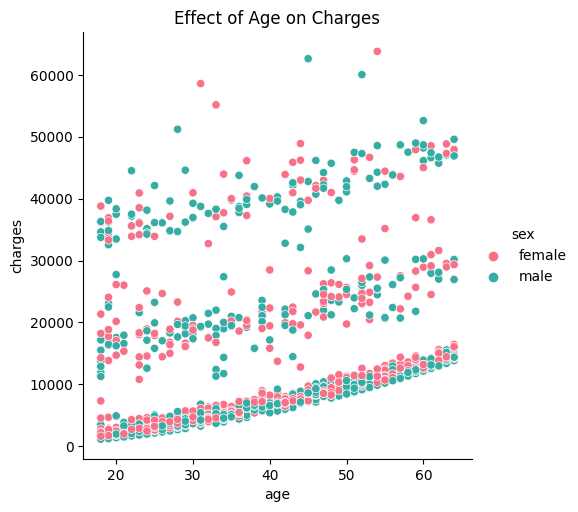

In [93]:
#SIMPLY PLOTTING FOR FUN 

sns.relplot(x='age', y='charges', hue= 'sex', data=data, palette='husl')
plt.title('Effect of Age on Charges')

/var/folders/xr/rvs3y4j51wb_20993x051pbr0000gn/T/ipykernel_65601/2638326172.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.relplot(x='age', y='charges', col='sex',data=data, palette='husl')


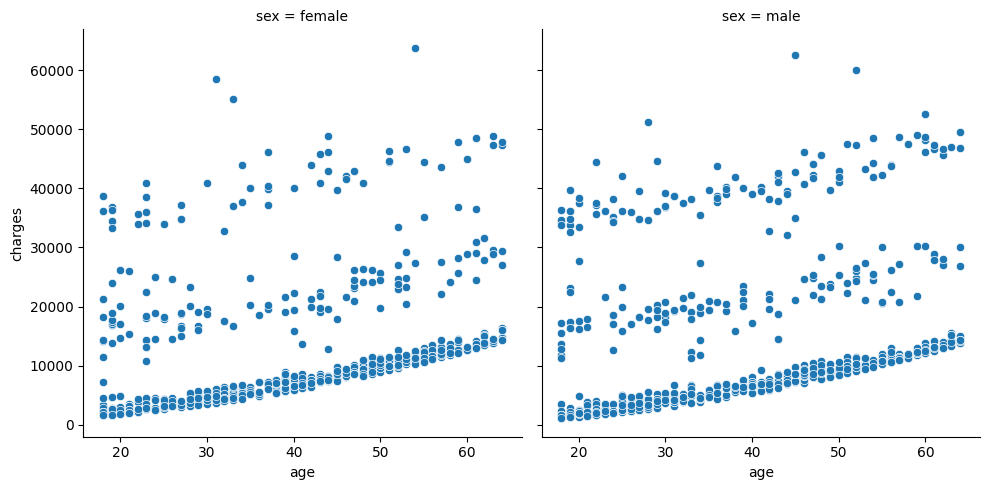

In [94]:
sns.relplot(x='age', y='charges', col='sex',data=data, palette='husl')

Text(0.5, 1.0, 'Combined effect of Age and Smoking on Charges')

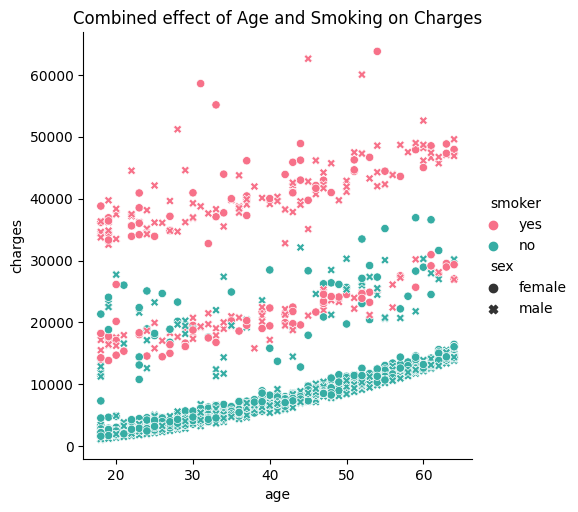

In [95]:
sns.relplot(x='age', y='charges', hue='smoker', style= 'sex', data=data, palette='husl')
plt.title('Combined effect of Age and Smoking on Charges')


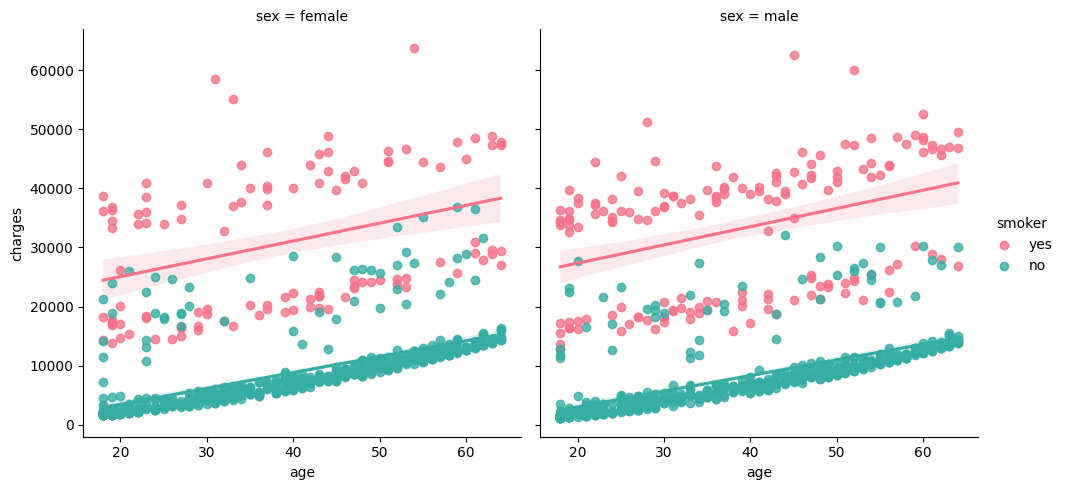

In [96]:
sns.lmplot(x='age', y='charges', hue='smoker', col='sex',data=data, palette='husl')

Text(0.5, 1.0, 'Effect of Smoking on Charges of males and females')

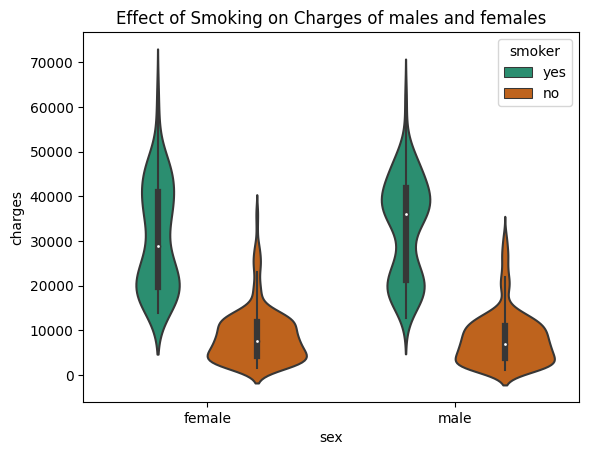

In [97]:
sns.violinplot(x="sex", y='charges', hue="smoker", data=data, palette='Dark2')
plt.title('Effect of Smoking on Charges of males and females')

In [98]:
data_grouped=data.groupby(['smoker', 'sex']).agg({'charges':'sum','sex':'count'})
data_grouped['mean_charges']= data_grouped['charges']/data_grouped['sex']
data_grouped=data_grouped.rename(columns={'sex':'number_in_gender'})
data_grouped.index=[0,1,2,3]
data_grouped['smoker']=['no','no','yes','yes']
data_grouped['sex']=['female','male','female','male']
data_grouped=data_grouped[['smoker', 'sex','number_in_gender','charges','mean_charges']]
data_grouped

,smoker,sex,number_in_gender,charges,mean_charges
0,no,female,547,4.792977e+06,8762.297300
1,no,male,517,4.181085e+06,8087.204731
2,yes,female,115,3.528085e+06,30678.996276
3,yes,male,159,5.253679e+06,33042.005975


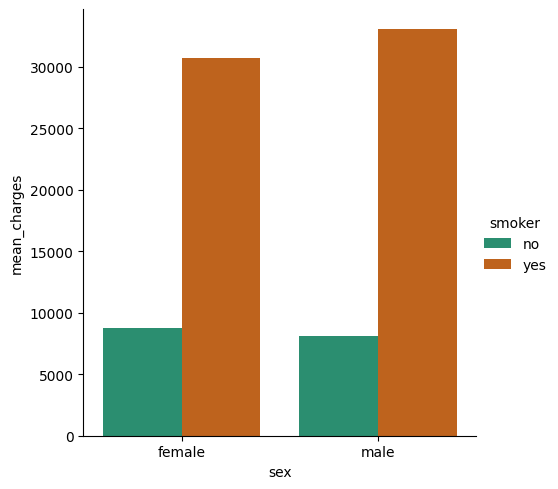

In [99]:
sns.catplot(x='sex',y='mean_charges',hue='smoker',kind='bar',data=data_grouped, palette='Dark2')


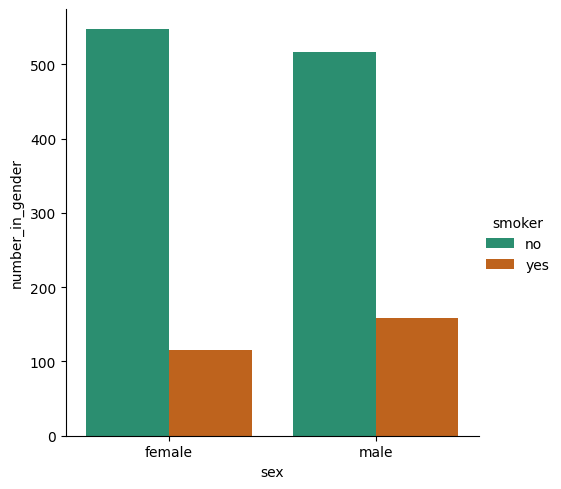

In [100]:
sns.catplot(x='sex',y='number_in_gender',hue='smoker',kind='bar',data=data_grouped, palette='Dark2')


Text(0.5, 1.0, 'Effect of BMI on Charges')

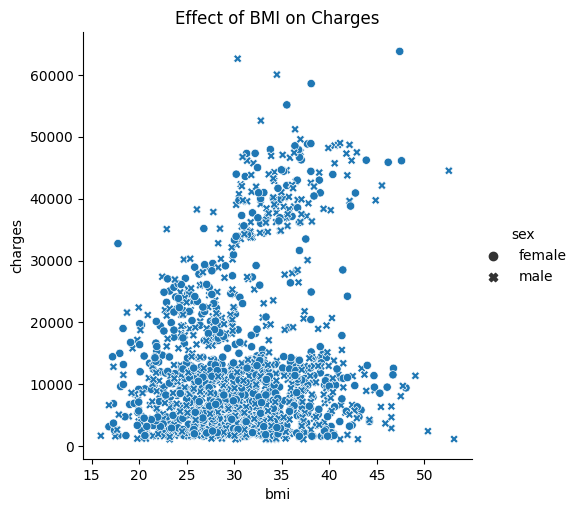

In [101]:
sns.relplot(x='bmi',y='charges',style='sex',data=data)
plt.title('Effect of BMI on Charges')

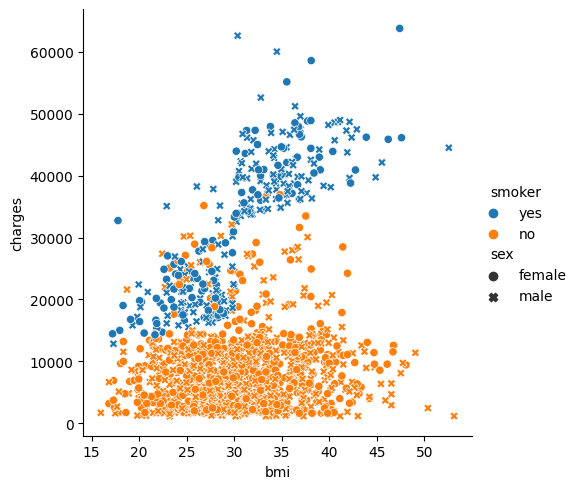

In [102]:
sns.relplot(x='bmi',y='charges',hue='smoker',style='sex',data=data)

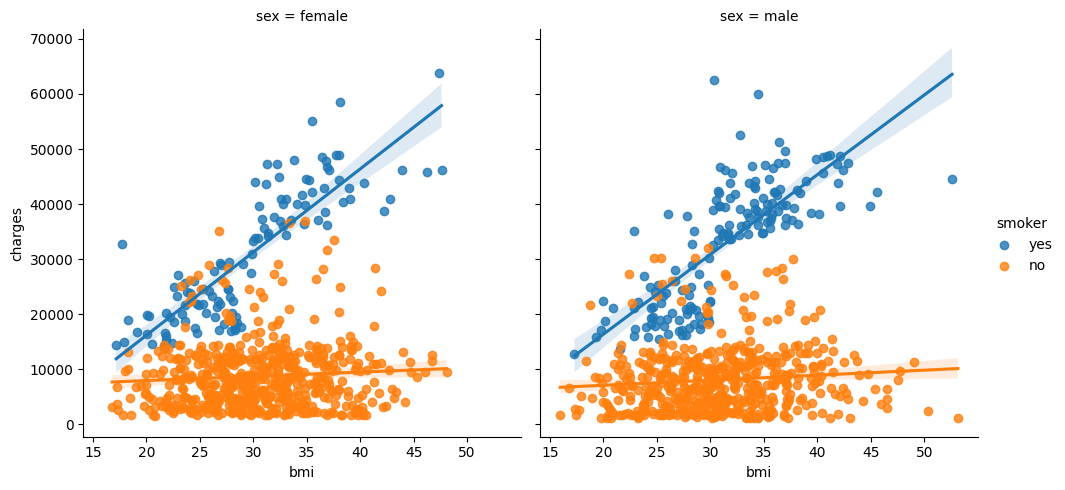

In [103]:
sns.lmplot(x='bmi',y='charges',hue='smoker', col='sex',data=data)

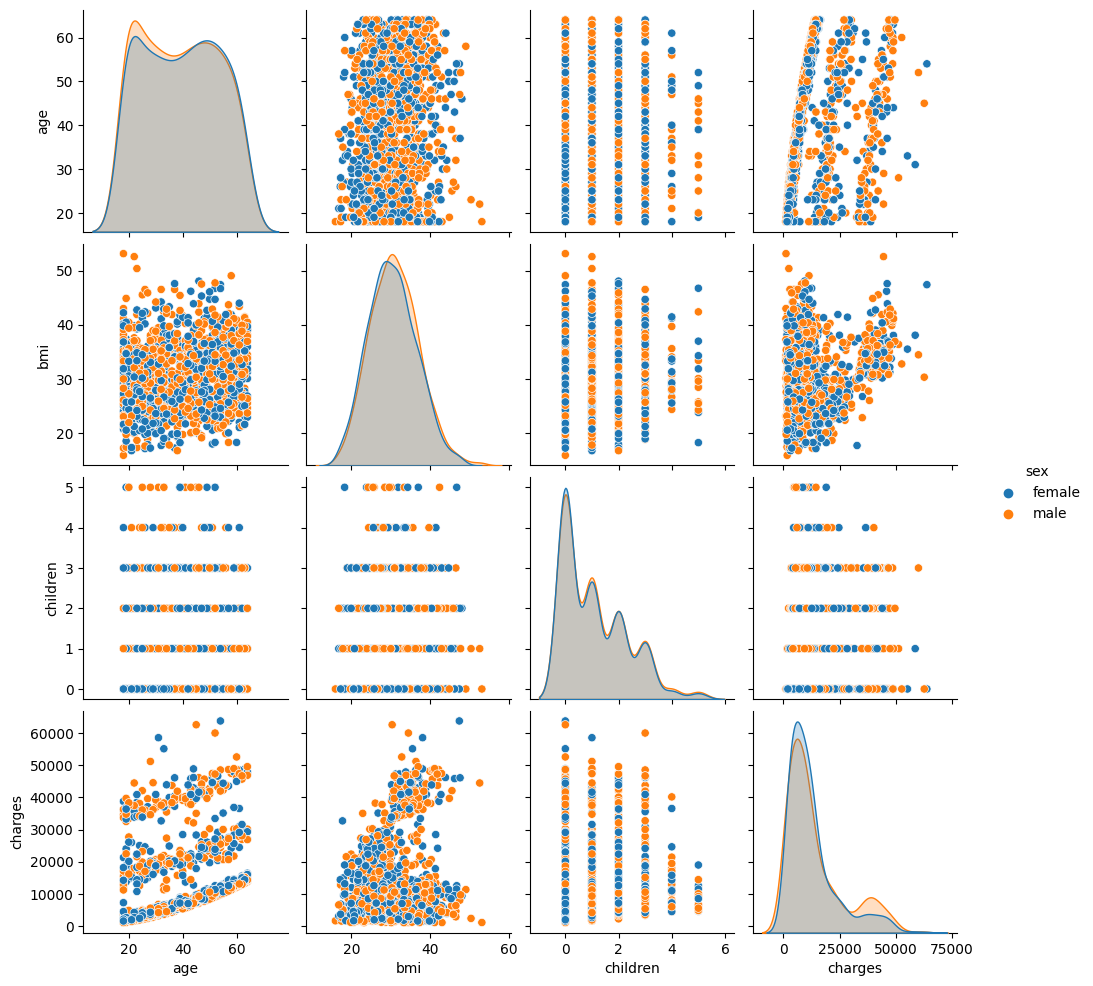

In [104]:
sns.pairplot(data, vars= ['age','bmi','children','charges'], hue='sex')


Text(0.5, 1.0, 'Charges vs number of children')

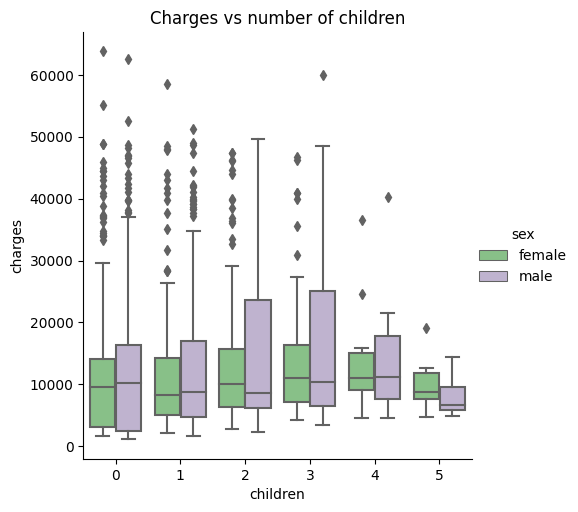

In [105]:
sns.catplot(x="children", y='charges', hue='sex', kind='box',data=data, palette= 'Accent')
plt.title('Charges vs number of children')

In [106]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
encoder.fit(data['sex'].drop_duplicates())
data['sex']=encoder.transform(data['sex'])
encoder.fit(data['smoker'].drop_duplicates())
data['smoker']=encoder.transform(data['smoker'])
data1=pd.get_dummies(data['region'], prefix='region')
data= pd.concat([data,data1], axis=1).drop(['region'],axis=1)
print(data.head(2))
print(data.dtypes)

   age  sex    bmi  children  smoker     charges  region_northeast  \
0   19    0  27.90         0       1  16884.9240             False   
1   18    1  33.77         1       0   1725.5523             False   

   region_northwest  region_southeast  region_southwest  
0             False             False              True  
1             False              True             False  
age                   int64
sex                   int64
bmi                 float64
children              int64
smoker                int64
charges             float64
region_northeast       bool
region_northwest       bool
region_southeast       bool
region_southwest       bool
dtype: object


In [107]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
encoder.fit(data['sex'].drop_duplicates())
data['sex']=encoder.transform(data['sex'])
encoder.fit(data['smoker'].drop_duplicates())
data['smoker']=encoder.transform(data['smoker'])
data1=pd.get_dummies(data['region'], prefix='region')
data= pd.concat([data,data1], axis=1).drop(['region'],axis=1)
print(data.head(2))
print(data.dtypes)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
y= data['charges']
X = data.drop(['charges'], axis=1)
lin_reg=LinearRegression()
train_X, test_X, train_y, test_y = train_test_split(X.values, y.values, test_size=0.25, random_state=21)
lin_reg.fit(train_X,train_y)
pred_y=lin_reg.predict(test_X)
rmse = np.sqrt(mean_squared_error(test_y, pred_y))
print("RMSE: %f" % (rmse))


from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from xgboost import plot_importance
import numpy as np

y= data['charges']
X = data.drop(['charges'], axis=1)
train_X, test_X, train_y, test_y = train_test_split(X.values, y.values, test_size=0.25, random_state=21)
train_X = pd.DataFrame(data=train_X, columns=X.columns)
test_X = pd.DataFrame(data=test_X, columns=X.columns)

model_x = XGBRegressor(n_estimators=1000, learning_rate=0.05)

model_x.fit(train_X, train_y, early_stopping_rounds=5,eval_set=[(test_X, test_y)], verbose=False)
predictions = model_x.predict(test_X)

rmse = np.sqrt(mean_squared_error(test_y, predictions))
print("RMSE: %f" % (rmse))
plot_importance(model_x)

KeyError: 'region'

In [ ]:
!pip3 install xgboost
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from xgboost import plot_importance
import numpy as np

y= data['charges']
X = data.drop(['charges'], axis=1)
train_X, test_X, train_y, test_y = train_test_split(X.values, y.values, test_size=0.25, random_state=21)
train_X = pd.DataFrame(data=train_X, columns=X.columns)
test_X = pd.DataFrame(data=test_X, columns=X.columns)

model_x = XGBRegressor(n_estimators=1000, learning_rate=0.05)

model_x.fit(train_X, train_y, early_stopping_rounds=5,eval_set=[(test_X, test_y)], verbose=False)
predictions = model_x.predict(test_X)

rmse = np.sqrt(mean_squared_error(test_y, predictions))
print("RMSE: %f" % (rmse))
plot_importance(model_x)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 1.9 MB/s eta 0:00:0000:0100:010m

[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python3.11 -m pip install --upgrade pip


ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, The experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:age: object, sex: object, bmi: object, children: object, smoker: object, region_northeast: object, region_northwest: object, region_southeast: object, region_southwest: object